In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path


# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Hardcode the 'metric_type' based on the column names from 'value_vars'
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Step 4: Merge the Mortality data with the financial data (CHE, GDP, etc.)
merged_df = pd.merge(mortality_long_df, financial_long_df, how='inner', on=['location_name', 'year'])

# Step 5: Merge with GHED data (Out_of_Pocket_Expense, Oops_che, Income)
# Rename cause_name in GHED data to avoid conflict with Mortality data
ghed_df.rename(columns={'cause_name': 'ghed_cause_name'}, inplace=True)

# Select relevant columns from GHED
ghed_relevant_columns = ['location_name', 'year', 'Out_of_Pocket_Expense', 'Income', 'Oops_che']

# Merge with GHED data
final_merged_df = pd.merge(merged_df, ghed_df[ghed_relevant_columns], how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
final_merged_df.to_csv('final_merged_analysis_data.csv', index=False)

# Show the final merged dataframe sample to check if the merge is correct
print(final_merged_df.head())





KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Hardcode the 'metric_type' based on the column names from 'value_vars'
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Step 4: Merge the Mortality data with the financial data (CHE, GDP, etc.)
merged_df = pd.merge(mortality_long_df, financial_long_df, how='inner', on=['location_name', 'year'])

# Step 5: Merge with GHED data (Out_of_Pocket_Expense, Oops_che, Income)
# Rename cause_name in GHED data to avoid conflict with Mortality data
ghed_df.rename(columns={'cause_name': 'ghed_cause_name'}, inplace=True)

# Select relevant columns from GHED
ghed_relevant_columns = ['location_name', 'year', 'Out_of_Pocket_Expense', 'Income', 'Oops_che']

# Merge with GHED data
final_merged_df = pd.merge(merged_df, ghed_df[ghed_relevant_columns], how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
final_merged_df.to_csv('final_merged_analysis_data.csv', index=False)

# Show the final merged dataframe sample to check if the merge is correct
print(final_merged_df.head())


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Check the structure of the melted dataframe to make sure 'variable' exists
print(mortality_long_df.head())

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Check the structure of the melted financial dataframe to make sure 'variable' exists
print(financial_long_df.head())

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Hardcode the 'metric_type' based on the column names from 'value_vars'
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Step 4: Merge the Mortality data with the financial data (CHE, GDP, etc.)
merged_df = pd.merge(mortality_long_df, financial_long_df, how='inner', on=['location_name', 'year'])

# Step 5: Merge with GHED data (Out_of_Pocket_Expense, Oops_che, Income)
# Rename cause_name in GHED data to avoid conflict with Mortality data
ghed_df.rename(columns={'cause_name': 'ghed_cause_name'}, inplace=True)

# Select relevant columns from GHED
ghed_relevant_columns = ['location_name', 'year', 'Out_of_Pocket_Expense', 'Income', 'Oops_che']

# Merge with GHED data
final_merged_df = pd.merge(merged_df, ghed_df[ghed_relevant_columns], how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
final_merged_df.to_csv('final_merged_analysis_data.csv', index=False)

# Show the final merged dataframe sample to check if the merge is correct
print(final_merged_df.head())


  location_name                               cause_name  \
0     australia                  Acute lymphoid leukemia   
1     australia                   Acute myeloid leukemia   
2     australia                           Bladder cancer   
3     australia  Brain and central nervous system cancer   
4     australia                            Breast cancer   

                    year  mortality_count  
0  1990 (All Age Deaths)            149.0  
1  1990 (All Age Deaths)            422.1  
2  1990 (All Age Deaths)            762.1  
3  1990 (All Age Deaths)            919.2  
4  1990 (All Age Deaths)           2613.3  
  location_name                               cause_name      year  \
0     australia                  Acute lymphoid leukemia  CHE_2010   
1     australia                   Acute myeloid leukemia  CHE_2010   
2     australia                           Bladder cancer  CHE_2010   
3     australia  Brain and central nervous system cancer  CHE_2010   
4     australia          

KeyError: 'variable'

In [ ]:

import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Hardcode the 'metric_type' based on the column names from 'value_vars'
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Step 4: Merge the Mortality data with the financial data (CHE, GDP, etc.)
merged_df = pd.merge(mortality_long_df, financial_long_df, how='inner', on=['location_name', 'year'])

# Step 5: Merge with GHED data (Out_of_Pocket_Expense, Oops_che, Income)
# Rename cause_name in GHED data to avoid conflict with Mortality data
ghed_df.rename(columns={'cause_name': 'ghed_cause_name'}, inplace=True)

# Select relevant columns from GHED
ghed_relevant_columns = ['location_name', 'year', 'Out_of_Pocket_Expense', 'Income', 'Oops_che']

# Merge with GHED data
final_merged_df = pd.merge(merged_df, ghed_df[ghed_relevant_columns], how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
final_merged_df.to_csv('final_merged_analysis_data.csv', index=False)

# Show the final merged dataframe sample to check if the merge is correct
print(final_merged_df.head())


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Print the melted mortality data
print(mortality_long_df.head())


  location_name                               cause_name  year  \
0     australia                  Acute lymphoid leukemia  1990   
1     australia                   Acute myeloid leukemia  1990   
2     australia                           Bladder cancer  1990   
3     australia  Brain and central nervous system cancer  1990   
4     australia                            Breast cancer  1990   

   mortality_count  
0            149.0  
1            422.1  
2            762.1  
3            919.2  
4           2613.3  


In [ ]:
# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Add 'metric_type' based on the column names
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Print the melted financial data with metric_type
print(financial_long_df.head())

print(financial_long_df.head())


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Check the melted dataframe to ensure 'variable' exists (this will contain the column names like CHE_2010, GDP_2020, etc.)
print(financial_long_df.head())

# Step 3: Correctly assign the 'metric_type' based on the column names (now available in 'variable')
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: 'CHE_PERCAP' if 'CHE_PERCAP' in x else    # Prioritize 'CHE_PERCAP'
              ('CHE' if 'CHE' in x and 'CHE_PERCAP' not in x else  # Check for CHE but not CHE_PERCAP
               ('GDP' if 'GDP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Print the financial_long_df to verify the 'metric_type' column has been assigned correctly
print(financial_long_df.head())


  location_name                               cause_name  year  metric_value
0     australia                  Acute lymphoid leukemia  2010      8.420257
1     australia                   Acute myeloid leukemia  2010      8.420257
2     australia                           Bladder cancer  2010      8.420257
3     australia  Brain and central nervous system cancer  2010      8.420257
4     australia                            Breast cancer  2010      8.420257


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Set the 'metric_type' to be the same as the column name (variable)
financial_long_df['metric_type'] = financial_long_df['variable']

# Print the financial_long_df to verify the 'metric_type' has the same value as the column name
print(financial_long_df.head())


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Print the melted mortality data to check if it's correct
print("Melted Mortality Data:")
print(mortality_long_df.head())  # Check the structure to verify the melt

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Add the metric_type based on the column names
# Directly use the column names for metric_type (the 'variable' column should now hold the original column names)
financial_long_df['metric_type'] = financial_long_df['variable']

# Print the melted financial data with metric_type
print("Melted Financial Data with Metric Type:")
print(financial_long_df.head())


Melted Mortality Data:
  location_name                               cause_name  year  \
0     australia                  Acute lymphoid leukemia  1990   
1     australia                   Acute myeloid leukemia  1990   
2     australia                           Bladder cancer  1990   
3     australia  Brain and central nervous system cancer  1990   
4     australia                            Breast cancer  1990   

   mortality_count  
0            149.0  
1            422.1  
2            762.1  
3            919.2  
4           2613.3  


KeyError: 'variable'

In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='year', value_name='mortality_count')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Print the melted mortality data to check if it's correct
print("Melted Mortality Data:")
print(mortality_long_df.head())  # Check the structure to verify the melt

# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Manually assign 'metric_type' based on the column names
financial_long_df['metric_type'] = financial_long_df['year'].apply(
    lambda x: 'CHE' if 'CHE' in x else
              ('GDP' if 'GDP' in x else
               ('CHE_PERCAP' if 'CHE_PERCAP' in x else
                ('TOTAL_POP' if 'TOTAL_POP' in x else 'Unknown')))
)

# Print the melted financial data with metric_type
print("Melted Financial Data with Metric Type:")
print(financial_long_df.head())


Melted Mortality Data:
  location_name                               cause_name  year  \
0     australia                  Acute lymphoid leukemia  1990   
1     australia                   Acute myeloid leukemia  1990   
2     australia                           Bladder cancer  1990   
3     australia  Brain and central nervous system cancer  1990   
4     australia                            Breast cancer  1990   

   mortality_count  
0            149.0  
1            422.1  
2            762.1  
3            919.2  
4           2613.3  


TypeError: argument of type 'int' is not iterable

In [ ]:
# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Manually assign 'metric_type' based on the column names (CHE_2010, GDP_2020, etc.)
# Create a 'metric_type' based on the column name in the 'variable' column
financial_long_df['metric_type'] = financial_long_df['variable'].apply(
    lambda x: x  # Keep the column name itself, like CHE_2010, GDP_2020, etc.
)

# Print the melted financial data with 'metric_type'
print("Melted Financial Data with Metric Type:")
print(financial_long_df.head())


KeyError: 'variable'

In [ ]:
# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Directly assign 'metric_type' based on the column names (e.g., CHE_2010, GDP_2020)
financial_long_df['metric_type'] = financial_long_df['variable']

# Print the melted financial data with metric_type
print("Melted Financial Data with Metric Type:")
print(financial_long_df.head())


KeyError: 'variable'

In [ ]:
# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='year', value_name='metric_value')

# Clean up the 'year' column by extracting the numeric year from the column names
financial_long_df['year'] = financial_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
financial_long_df['year'] = pd.to_numeric(financial_long_df['year'], errors='coerce')

# Step 3: Directly assign 'metric_type' based on the column names (CHE_2010, GDP_2020, etc.)
# Directly assign the column name as the metric type
financial_long_df['metric_type'] = financial_long_df['year'].apply(
    lambda x: x  # Directly use the column names as the metric_type (e.g., CHE_2010, GDP_2020)
)

# Print the melted financial data with metric_type
print("Melted Financial Data with Metric Type:")
print(financial_long_df.head())


Melted Financial Data with Metric Type:
  location_name                               cause_name  year  metric_value  \
0     australia                  Acute lymphoid leukemia  2010      8.420257   
1     australia                   Acute myeloid leukemia  2010      8.420257   
2     australia                           Bladder cancer  2010      8.420257   
3     australia  Brain and central nervous system cancer  2010      8.420257   
4     australia                            Breast cancer  2010      8.420257   

   metric_type  
0         2010  
1         2010  
2         2010  
3         2010  
4         2010  


In [ ]:
import pandas as pd

# Load your datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Step 1: Melt the Mortality data for All Age Deaths (mortality_count)
all_age_deaths_columns = ['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                          '2020 (All Age Deaths)', '2021 (All Age Deaths)']

# Melt the mortality data for all age deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=all_age_deaths_columns,
                                      var_name='mortality_year', value_name='mortality_count')

# Extract the numeric year from the column names (without overwriting 'year')
mortality_long_df['extracted_year'] = mortality_long_df['mortality_year'].str.extract('(\d{4})')

# Ensure the 'extracted_year' column is numeric for correct merging
mortality_long_df['extracted_year'] = pd.to_numeric(mortality_long_df['extracted_year'], errors='coerce')

# Drop the original 'mortality_year' column after extracting the year
mortality_long_df.drop(columns=['mortality_year'], inplace=True)

# Print the melted mortality data to check if it's correct
print("Melted Mortality Data (All Age Deaths):")
print(mortality_long_df.head())  # Check the structure to verify the melt


# Step 2: Melt the GDP, CHE, CHE_PERCAP, and TOTAL_POP columns from the Mortality dataset
financial_columns = [
    'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
    'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
    'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
    'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'
]

# Melt the financial data
financial_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=financial_columns,
                                      var_name='financial_year', value_name='metric_value')

# Step 3: Extract the year from the financial columns and assign the 'metric_type' based on the column name
financial_long_df['extracted_year'] = financial_long_df['financial_year'].str.extract('(\d{4})')

# Ensure the 'extracted_year' column is numeric for correct merging
financial_long_df['extracted_year'] = pd.to_numeric(financial_long_df['extracted_year'], errors='coerce')

# Assign the 'metric_type' as the original column name
financial_long_df['metric_type'] = financial_long_df['financial_year']

# Drop the original 'financial_year' column
financial_long_df.drop(columns=['financial_year'], inplace=True)

# Print the melted financial data to check if it's correct
print("Melted Financial Data (CHE, GDP, etc.):")
print(financial_long_df.head())


Melted Mortality Data (All Age Deaths):
  location_name                               cause_name  mortality_count  \
0     australia                  Acute lymphoid leukemia            149.0   
1     australia                   Acute myeloid leukemia            422.1   
2     australia                           Bladder cancer            762.1   
3     australia  Brain and central nervous system cancer            919.2   
4     australia                            Breast cancer           2613.3   

   extracted_year  
0            1990  
1            1990  
2            1990  
3            1990  
4            1990  
Melted Financial Data (CHE, GDP, etc.):
  location_name                               cause_name  metric_value  \
0     australia                  Acute lymphoid leukemia      8.420257   
1     australia                   Acute myeloid leukemia      8.420257   
2     australia                           Bladder cancer      8.420257   
3     australia  Brain and central nervou

In [ ]:
# Load the GHED dataset (make sure the path is correct)
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path

# Ensure 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()

# Merge the melted mortality data and financial data on 'location_name' and 'extracted_year'
merged_df = pd.merge(mortality_long_df, financial_long_df,
                     on=['location_name', 'extracted_year'], how='inner')

# Print to check the merged data
print("Merged Mortality and Financial Data:")
print(merged_df.head())



Merged Mortality and Financial Data:
  location_name             cause_name_x  mortality_count  extracted_year  \
0     australia  Acute lymphoid leukemia            139.5            2010   
1     australia  Acute lymphoid leukemia            139.5            2010   
2     australia  Acute lymphoid leukemia            139.5            2010   
3     australia  Acute lymphoid leukemia            139.5            2010   
4     australia  Acute lymphoid leukemia            139.5            2010   

                              cause_name_y  metric_value metric_type  
0                  Acute lymphoid leukemia      8.420257    CHE_2010  
1                   Acute myeloid leukemia      8.420257    CHE_2010  
2                           Bladder cancer      8.420257    CHE_2010  
3  Brain and central nervous system cancer      8.420257    CHE_2010  
4                            Breast cancer      8.420257    CHE_2010  


In [ ]:
# Merge with GHED dataset to add 'Out_of_Pocket_Expense', 'Income', and 'Oops_che'
ghed_long_df = ghed_df[['location_name', 'year', 'Out of Pocket Expense', 'Income', 'oops_che']]

# Ensure that 'year' in GHED matches 'extracted_year' in the merged data
merged_df = pd.merge(merged_df, ghed_long_df,
                     left_on=['location_name', 'extracted_year'],
                     right_on=['location_name', 'year'],
                     how='left')

# Drop the extra 'year' column that was merged from GHED (as 'extracted_year' is already in the dataset)
merged_df.drop(columns=['year'], inplace=True)

# Print the final merged data
print("Final Merged Data with GHED:")
print(merged_df.head())


Final Merged Data with GHED:
  location_name             cause_name_x  mortality_count  extracted_year  \
0     australia  Acute lymphoid leukemia            139.5            2010   
1     australia  Acute lymphoid leukemia            139.5            2010   
2     australia  Acute lymphoid leukemia            139.5            2010   
3     australia  Acute lymphoid leukemia            139.5            2010   
4     australia  Acute lymphoid leukemia            139.5            2010   

                              cause_name_y  metric_value metric_type  \
0                  Acute lymphoid leukemia      8.420257    CHE_2010   
1                   Acute myeloid leukemia      8.420257    CHE_2010   
2                           Bladder cancer      8.420257    CHE_2010   
3  Brain and central nervous system cancer      8.420257    CHE_2010   
4                            Breast cancer      8.420257    CHE_2010   

   Out of Pocket Expense Income  oops_che  
0                    NaN    NaN

In [ ]:
# Load your GHED dataset (make sure the path is correct)
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path

# Ensure 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()

# Rename the 'year' column in GHED to 'extracted_year' for correct merge
ghed_df.rename(columns={'year': 'extracted_year'}, inplace=True)

# Check unique values in both datasets for location_name and extracted_year
print("Unique location names and years in the merged dataframe:")
print(merged_df[['location_name', 'extracted_year']].drop_duplicates())

print("Unique location names and years in the GHED dataset:")
print(ghed_df[['location_name', 'extracted_year']].drop_duplicates())

# Step 1: Merge the melted mortality data and financial data on 'location_name' and 'extracted_year'
merged_df = pd.merge(mortality_long_df, financial_long_df,
                     on=['location_name', 'extracted_year'], how='inner')

# Step 2: Merge with GHED dataset to add 'Out_of_Pocket_Expense', 'Income', and 'Oops_che'
merged_df = pd.merge(merged_df, ghed_df[['location_name', 'extracted_year', 'Out of Pocket Expense', 'Income', 'oops_che']],
                     on=['location_name', 'extracted_year'], how='left')

# Print the final merged data
print("Final Merged Data with GHED:")
print(merged_df.head())


Unique location names and years in the merged dataframe:
         location_name  extracted_year
0            australia            2010
6400             japan            2010
12800           canada            2010
19200    united states            2010
25600          germany            2010
32000   united kingdom            2010
38400           mexico            2010
44800           brazil            2010
51200     saudi arabia            2010
57600            india            2010
64000            china            2010
70400         viet nam            2010
76800         ethiopia            2010
83200           rwanda            2010
89600     south africa            2010
96000        australia            2019
102400           japan            2019
108800          canada            2019
115200   united states            2019
121600         germany            2019
128000  united kingdom            2019
134400          mexico            2019
140800          brazil            2019
147200 

In [ ]:
# Summarizing the total deaths by cause_name
total_deaths = merged_df.groupby('cause_name')['All_age_deaths'].sum().reset_index()
total_deaths_sorted = total_deaths.sort_values(by='All_age_deaths', ascending=False)

# Show top 10 causes with highest total deaths
total_deaths_sorted.head(10)


,cause_name,All_age_deaths
17,Ischemic heart disease,12688847.0
15,Chronic obstructive pulmonary disease,7708566.6
18,Ischemic stroke,5413891.9
36,Stomach cancer,1875533.7
16,Esophageal cancer,1150229.6
4,Breast cancer,818753.6
35,Rheumatic heart disease,798161.2
31,Pancreatic cancer,715759.0
9,Chronic kidney disease due to diabetes mellitu...,676920.5
6,Chronic hepatitis B including cirrhosis,662772.7


In [ ]:
import pandas as pd

# Load your datasets with the correct file paths
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with the correct path to the mortality bank dataset
ghed_df = pd.read_excel('/content/Preprocessed_GHED.xlsx')  # Replace with the correct path to the GHED dataset

# Ensure 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()

# Step 1: Identify Top 5 Countries with High Mortality

# Group by location_name (countries) and sum mortality counts for each year
country_mortality = mortality_df.groupby('location_name')[['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)', '2020 (All Age Deaths)', '2021 (All Age Deaths)']].sum()

# Sum across all years to get total mortality for each country
country_mortality['total_mortality'] = country_mortality.sum(axis=1)

# Sort the countries by total mortality count in descending order
country_mortality_sorted = country_mortality['total_mortality'].sort_values(ascending=False)

# Get the top 5 countries with highest mortality
top_5_countries = country_mortality_sorted.head(5)

print("Top 5 Countries with Highest Mortality:")
print(top_5_countries)


# Filter Low and Lower-middle income countries from GHED dataset
low_income_countries = ghed_df[ghed_df['Income'] == 'Low']['location_name'].unique()
lower_middle_income_countries = ghed_df[ghed_df['Income'] == 'Lower-middle']['location_name'].unique()

# Print the unique Low and Lower-middle income countries
print("Low Income Countries from GHED:")
print(low_income_countries)

print("\nLower-middle Income Countries from GHED:")
print(lower_middle_income_countries)

# Step 3: Compare Overlap Between Top 5 Mortality Countries and Low-Income and Lower-middle Income Countries
low_and_lower_middle_income_countries = set(low_income_countries).union(set(lower_middle_income_countries))

# Find the overlap between the top 5 mortality countries and low + lower-middle income countries
overlap = top_5_countries.index.intersection(low_and_lower_middle_income_countries)

# Print the overlap
print("Countries with High Mortality and Low or Lower-middle Income (Overlap):")
print(overlap)


Top 5 Countries with Highest Mortality:
location_name
china            27430043.8
india            16685687.9
united states     6230957.1
japan             2552962.4
brazil            2338164.4
Name: total_mortality, dtype: float64
Low Income Countries from GHED:
['ethiopia' 'rwanda']

Lower-middle Income Countries from GHED:
['india' 'viet nam']
Countries with High Mortality and Low or Lower-middle Income (Overlap):
Index(['india'], dtype='object', name='location_name')


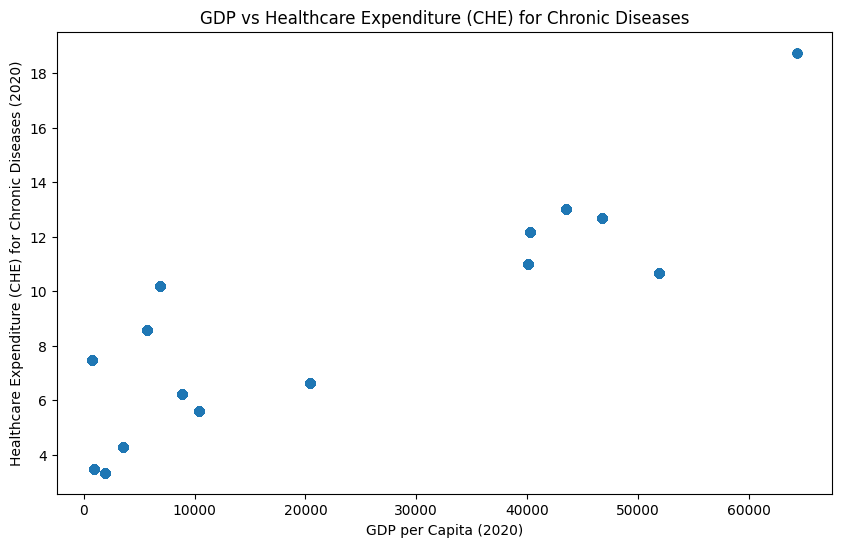

Correlation between GDP and Healthcare Expenditure (CHE) in 2020:
                 GDP_PERCAP_2020  CHE_2020
GDP_PERCAP_2020         1.000000  0.836709
CHE_2020                0.836709  1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with the actual path to your mortality bank dataset
ghed_df = pd.read_excel('/content/Preprocessed_GHED.xlsx')  # Replace with the actual path to your GHED dataset

# Ensure 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()

# Extract relevant columns from the mortality and GHED datasets
# For Mortality dataset, we need GDP and CHE columns
gdp_columns = ['GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021']
che_columns = ['CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021']

# For GHED dataset, we need Out-of-Pocket Expenses and Income
out_of_pocket_columns = ['Out of Pocket Expense']
income_columns = ['Income']

# Merge GDP and CHE from the mortality dataset with Out-of-Pocket and Income from GHED dataset
merged_df = pd.merge(mortality_df[['location_name'] + gdp_columns + che_columns],
                     ghed_df[['location_name'] + out_of_pocket_columns + income_columns],
                     on='location_name', how='inner')

# Correlation between GDP and CHE
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP_PERCAP_2020'], merged_df['CHE_2020'], alpha=0.6)
plt.title('GDP vs Healthcare Expenditure (CHE) for Chronic Diseases')
plt.xlabel('GDP per Capita (2020)')
plt.ylabel('Healthcare Expenditure (CHE) for Chronic Diseases (2020)')
plt.show()

# Calculate the correlation
correlation_gdp_che = merged_df[['GDP_PERCAP_2020', 'CHE_2020']].corr()
print("Correlation between GDP and Healthcare Expenditure (CHE) in 2020:")
print(correlation_gdp_che)


<ipython-input-81-6081fb7e8693>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Income_numeric'] = filtered_data['Income'].map(income_encoding)


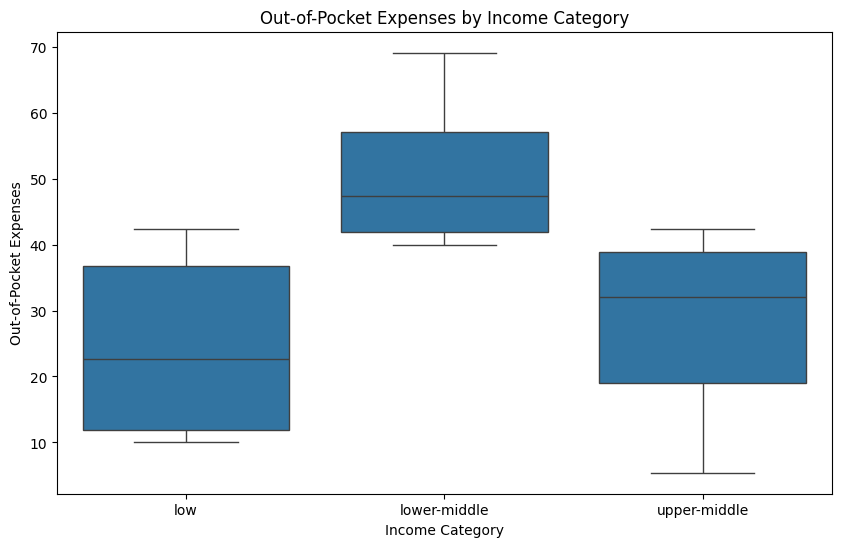

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is loaded in ghed_df
# ghed_df = pd.read_excel('/content/Preprocessed_GHED.xlsx')  # Uncomment if it's not loaded yet

# Ensure 'Income' column is in the correct format (lowercase and stripped)
ghed_df['Income'] = ghed_df['Income'].str.strip().str.lower()

# Filter the data to focus on low, lower-middle, and upper-middle income countries
income_categories = ['low', 'lower-middle', 'upper-middle']
filtered_data = ghed_df[ghed_df['Income'].isin(income_categories)]

# Encode the 'Income' column: low = 1, lower-middle = 2, upper-middle = 3
income_encoding = {'low': 1, 'lower-middle': 2, 'upper-middle': 3}
filtered_data['Income_numeric'] = filtered_data['Income'].map(income_encoding)

# Box plot for Out-of-Pocket Expenses by Income Category (numerically encoded)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Out of Pocket Expense', data=filtered_data,
            order=['low', 'lower-middle', 'upper-middle'])  # Ensure correct ordering of categories
plt.title('Out-of-Pocket Expenses by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Out-of-Pocket Expenses')
plt.show()


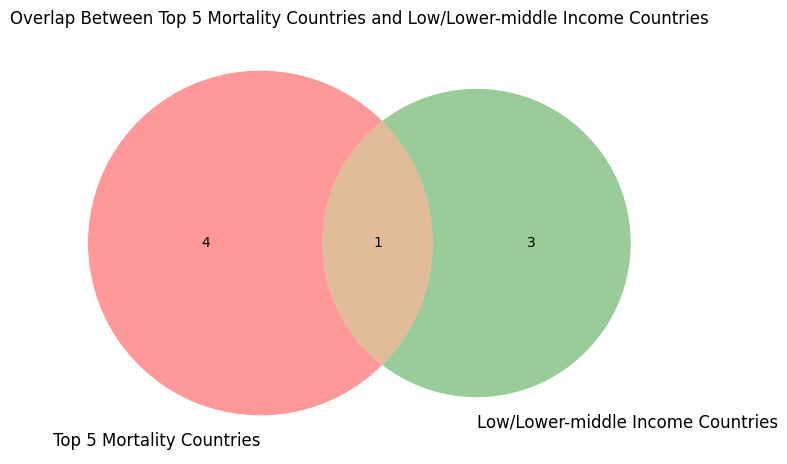

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create sets for top 5 countries with high mortality and low/lower-middle income countries
top_5_mortality_countries_set = set(top_5_countries.index)
low_and_lower_middle_income_countries_set = set(low_income_countries).union(set(lower_middle_income_countries))

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn2([top_5_mortality_countries_set, low_and_lower_middle_income_countries_set],
      set_labels=('Top 5 Mortality Countries', 'Low/Lower-middle Income Countries'))

# Title and display the plot
plt.title('Overlap Between Top 5 Mortality Countries and Low/Lower-middle Income Countries')
plt.show()


AttributeError: 'list' object has no attribute 'items'

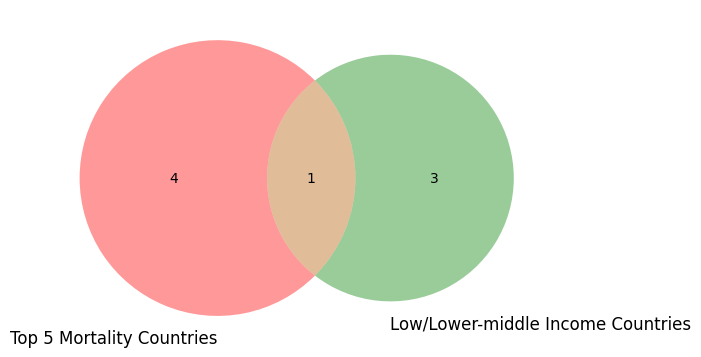

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create sets for top 5 countries with high mortality and low/lower-middle income countries
top_5_mortality_countries_set = set(top_5_countries.index)
low_and_lower_middle_income_countries_set = set(low_income_countries).union(set(lower_middle_income_countries))

# Create the Venn diagram with country names
venn = venn2([top_5_mortality_countries_set, low_and_lower_middle_income_countries_set],
             set_labels=('Top 5 Mortality Countries', 'Low/Lower-middle Income Countries'))

# Adding the country names in each section of the Venn diagram
for i, (key, label) in enumerate(venn.subset_labels.items()):
    if key == (1, 0):  # Only Top 5 Mortality Countries
        venn.subset_labels[key] = "\n".join(top_5_mortality_countries_set - low_and_lower_middle_income_countries_set)
    elif key == (0, 1):  # Only Low/Lower-middle Income Countries
        venn.subset_labels[key] = "\n".join(low_and_lower_middle_income_countries_set - top_5_mortality_countries_set)
    elif key == (1, 1):  # Overlap
        venn.subset_labels[key] = "\n".join(top_5_mortality_countries_set.intersection(low_and_lower_middle_income_countries_set))

# Title and display the plot
plt.title('Overlap Between Top 5 Mortality Countries and Low/Lower-middle Income Countries')
plt.show()


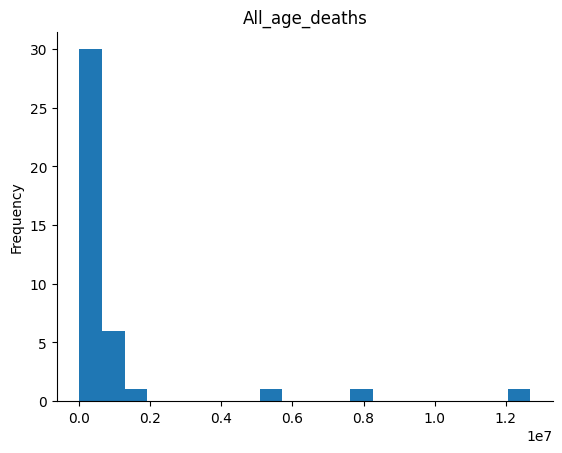

In [ ]:
# @title All_age_deaths

from matplotlib import pyplot as plt
total_deaths_sorted['All_age_deaths'].plot(kind='hist', bins=20, title='All_age_deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Summarizing healthcare expenditure (CHE) by disease and year
healthcare_spending = merged_df.groupby(['cause_name', 'year'])['CHE'].sum().reset_index()

# Plotting the trend of healthcare spending over the years for the top 5 causes with highest deaths
top_5_causes = total_deaths_sorted.head(5)['cause_name']
top_5_spending = healthcare_spending[healthcare_spending['cause_name'].isin(top_5_causes)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for cause in top_5_causes:
    cause_data = top_5_spending[top_5_spending['cause_name'] == cause]
    plt.plot(cause_data['year'], cause_data['CHE'], label=cause)

plt.title('Healthcare Expenditure for Top 5 Chronic Diseases')
plt.xlabel('Year')
plt.ylabel('Healthcare Expenditure')
plt.legend()
plt.show()


KeyError: 'Column not found: CHE'

In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel('/content/Preprocessed_GHED.xlsx')  # Replace with actual file path for Excel file
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path for CSV file



# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column after merging
mortality_df.drop(columns=['location_type'], inplace=True)

# Drop the ASMR columns from the Mortality dataset
asmr_columns = ['1990 (ASMR)', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)']
mortality_df.drop(columns=asmr_columns, inplace=True)

# Reshape Mortality Bank data: Keep the 'cause_name' intact while melting the All Age Deaths columns
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name',
                                               'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
                                               'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
                                               'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
                                               'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'],
                                      value_vars=['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                                                  '2020 (All Age Deaths)', '2021 (All Age Deaths)'],
                                      var_name='year', value_name='value')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Melt the CHE, CHE_PERCAP, GDP_PERCAP, and TOTAL_POP columns to align values by year
che_gdp_long_df = ghed_df.melt(id_vars=['location_name'],
                                value_vars=['CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
                                            'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
                                            'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
                                            'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'],
                                var_name='year', value_name='value')

# Clean up 'year' by extracting the numeric year
che_gdp_long_df['year'] = che_gdp_long_df['year'].str.extract('(\d{4})')
che_gdp_long_df['year'] = pd.to_numeric(che_gdp_long_df['year'], errors='coerce')

# Merge the reshaped Mortality Bank data with the melted GHED data on 'location_name' and 'year'
merged_df = pd.merge(mortality_long_df, che_gdp_long_df, how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
merged_df.to_csv('merged_analysis_data.csv', index=False)

# Show merged dataframe sample to check if the merge is correct
merged_df.head()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021', 'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021', 'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021', 'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021']"

In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv')  # Replace with actual file path

# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from mortality_df
mortality_df.drop(columns=['location_type'], inplace=True)

# Drop ASMR columns from the Mortality dataset
asmr_columns = ['1990 (ASMR)', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)']
mortality_df.drop(columns=asmr_columns, inplace=True)

# Reshape Mortality Bank data: Keeping the 'cause_name' intact while melting year columns for All Age Deaths
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                                                  '2020 (All Age Deaths)', '2021 (All Age Deaths)'],
                                      var_name='year', value_name='All_age_deaths')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Melt the CHE, CHE_PERCAP, GDP_PERCAP, TOTAL_POP, and other relevant GHED columns to align values by year
che_gdp_long_df = ghed_df.melt(id_vars=['location_name', 'Oops_che'],  # Keep 'Oops_che' and other relevant columns
                                value_vars=['CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
                                            'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
                                            'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
                                            'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'],
                                var_name='year', value_name='value')

# Clean up 'year' by extracting the numeric year from the column names
che_gdp_long_df['year'] = che_gdp_long_df['year'].str.extract('(\d{4})')
che_gdp_long_df['year'] = pd.to_numeric(che_gdp_long_df['year'], errors='coerce')

# Merge the reshaped Mortality Bank data with the melted GHED data on 'location_name' and 'year'
merged_df = pd.merge(mortality_long_df, che_gdp_long_df, how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
merged_df.to_csv('merged_analysis_data.csv', index=False)

# Drop the location_type column
merged_df.drop(columns=['location_type'], inplace=True)

# Show merged dataframe sample to check if the merge is correct
merged_df.head()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Oops_che', 'CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021', 'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021', 'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021', 'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021']"

In [ ]:
import pandas as pd

# Load your datasets
ghed_df = pd.read_excel("/content/Preprocessed_GHED.xlsx")  # Replace with actual file path
mortality_df = pd.read_csv('/content/mortality_bank.csv') # Replace with actual file path

import pandas as pd


# Ensure the 'location_name' column is in the same format (e.g., strip extra spaces or make lowercase)
ghed_df['location_name'] = ghed_df['location_name'].str.strip().str.lower()
mortality_df['location_name'] = mortality_df['location_name'].str.strip().str.lower()

# Drop the location_type column from the Mortality dataset
mortality_df.drop(columns=['location_type'], inplace=True)

# Drop ASMR columns from the Mortality dataset
asmr_columns = ['1990 (ASMR)', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)']
mortality_df.drop(columns=asmr_columns, inplace=True)

# Reshape Mortality Bank data: Keeping the 'cause_name' intact while melting the All Age Deaths columns
mortality_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                      value_vars=['1990 (All Age Deaths)', '2010(All Age Deaths)', '2019(All Age Deaths)',
                                                  '2020 (All Age Deaths)', '2021 (All Age Deaths)'],
                                      var_name='year', value_name='All_age_deaths')

# Clean up the 'year' column by extracting the numeric year from the column names
mortality_long_df['year'] = mortality_long_df['year'].str.extract('(\d{4})')

# Ensure the 'year' column is numeric for correct merging
mortality_long_df['year'] = pd.to_numeric(mortality_long_df['year'], errors='coerce')

# Melt the CHE, CHE_PERCAP, GDP_PERCAP, and TOTAL_POP columns to align values by year
mortality_che_gdp_long_df = mortality_df.melt(id_vars=['location_name', 'cause_name'],
                                              value_vars=['CHE_2010', 'CHE_2019', 'CHE_2020', 'CHE_2021',
                                                          'CHE_PERCAP_2010', 'CHE_PERCAP_2019', 'CHE_PERCAP_2020', 'CHE_PERCAP_2021',
                                                          'GDP_PERCAP_2010', 'GDP_PERCAP_2019', 'GDP_PERCAP_2020', 'GDP_PERCAP_2021',
                                                          'TOTAL_POP_2010', 'TOTAL_POP_2019', 'TOTAL_POP_2020', 'TOTAL_POP_2021'],
                                              var_name='year', value_name='value')

# Clean up 'year' by extracting the numeric year from the column names
mortality_che_gdp_long_df['year'] = mortality_che_gdp_long_df['year'].str.extract('(\d{4})')
mortality_che_gdp_long_df['year'] = pd.to_numeric(mortality_che_gdp_long_df['year'], errors='coerce')

# Merge the reshaped Mortality Bank data with the GHED data on 'location_name' and 'year'
merged_df = pd.merge(mortality_long_df, mortality_che_gdp_long_df, how='inner', on=['location_name', 'year'])

# Optionally, save the merged dataframe to a new file
merged_df.to_csv('merged_analysis_data.csv', index=False)

# Show merged dataframe sample to check if the merge is correct
merged_df.head()



,location_name,cause_name_x,year,All_age_deaths,cause_name_y,value
0,australia,Acute lymphoid leukemia,2010,139.5,Acute lymphoid leukemia,8.420257
1,australia,Acute lymphoid leukemia,2010,139.5,Acute myeloid leukemia,8.420257
2,australia,Acute lymphoid leukemia,2010,139.5,Bladder cancer,8.420257
3,australia,Acute lymphoid leukemia,2010,139.5,Brain and central nervous system cancer,8.420257
4,australia,Acute lymphoid leukemia,2010,139.5,Breast cancer,8.420257
